In [52]:
import pandas as pd
from pandas_datareader import data
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
data_inicio = '2015-01-01'
data_fim = '2022-01-01'

In [54]:
df = data.DataReader('petr4.sa', 'yahoo', data_inicio, data_fim)
# df['data_pregao'] = df.index
# df = df.reset_index(drop=True)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,9.990000,9.350000,9.990000,9.360000,49559500.0,7.928355
2015-01-05,9.190000,8.530000,9.140000,8.560000,78385100.0,7.250719
2015-01-06,8.830000,8.040000,8.710000,8.280000,84723300.0,7.013545
2015-01-07,8.730000,8.360000,8.560000,8.670000,85531000.0,7.343894
2015-01-08,9.390000,8.740000,8.790000,9.230000,83306300.0,7.818239
...,...,...,...,...,...,...
2021-09-01,27.340000,26.330000,27.320000,27.040001,69430400.0,27.040001
2021-09-02,27.350000,26.459999,27.000000,26.600000,56052000.0,26.600000
2021-09-03,26.780001,26.100000,26.650000,26.330000,58182700.0,26.330000


In [55]:
# bovespa = data.DataReader('^BVSP', 'yahoo', data_inicio, data_fim)
# bovespa['data_pregao'] = bovespa.index
# bovespa = bovespa.reset_index(drop=True)
# bovespa = bovespa.rename(columns=({'High': 'Bovespa_High', 'Low':'Bovespa_Low', 'Open':'Bovespa_Open', 'Close':'Bovespa_Close', 'Volume': 'Bovespa_Volume'}))
# bovespa

In [56]:
# usd = data.DataReader('USDBRL=X', 'yahoo', data_inicio, data_fim)
# usd['data_pregao'] = usd.index
# usd = usd.reset_index(drop=True)
# usd = usd.rename(columns=({'High': 'USD_High', 'Low':'USD_Low', 'Open':'USD_Open', 'Close':'USD_Close', 'Volume': 'USD_Volume'}))
# usd

In [57]:
# bovespa_usd = (bovespa.merge(usd, on='data_pregao', how='left', suffixes=('', '_y'))
#     .rename(lambda x: x.replace('_y', ''), axis=1))

In [58]:
# bov_acao_usd = (bovespa_usd.merge(df, on='data_pregao', how='left', suffixes=('', '_y'))
#     .rename(lambda x: x.replace('_y', ''), axis=1))

In [59]:
# selic = pd.read_json('https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json&dataInicial=04/01/2016&dataFinal=09/08/2021')
# selic

In [60]:
# selic['data'] = selic['data'].str.replace('/', '-')

In [61]:
# selic['data'] = pd.to_datetime(selic['data'], format='%d-%m-%Y')
# selic['data'] = pd.to_datetime(selic["data"].dt.strftime('%Y-%m-%d'))
# selic = selic.rename(columns={'valor':'selic', 'data': 'data_pregao'})
# selic

In [62]:
# selic_acao = (selic.merge(df, on='data_pregao', how='left', suffixes=('', '_y'))
#     .rename(lambda x: x.replace('_y', ''), axis=1))
# selic_acao

### Médias móveis de 5 dias e 21 dias

In [63]:
df['mm5D'] = df['Close'].rolling(5).mean()
df['mm21D'] = df['Close'].rolling(21).mean()
# bov_acao_usd['mm5D_BOVESPA'] = bov_acao_usd['Bovespa_Close'].rolling(5).mean()
# bov_acao_usd['mm21D_BOVESPA'] = bov_acao_usd['Bovespa_Close'].rolling(21).mean()
# bov_acao_usd['mm21D_USD'] = bov_acao_usd['USD_Close'].rolling(21).mean()
# bov_acao_usd['mm5D_USD'] = bov_acao_usd['USD_Close'].rolling(5).mean()
# bov_acao_usd
df.head(22)


,High,Low,Open,Close,Volume,Adj Close,mm5D,mm21D
Date,,,,,,,,
2015-01-02,9.99,9.35,9.99,9.36,49559500.0,7.928355,NaN,NaN
2015-01-05,9.19,8.53,9.14,8.56,78385100.0,7.250719,NaN,NaN
2015-01-06,8.83,8.04,8.71,8.28,84723300.0,7.013545,NaN,NaN
2015-01-07,8.73,8.36,8.56,8.67,85531000.0,7.343894,NaN,NaN
2015-01-08,9.39,8.74,8.79,9.23,83306300.0,7.818239,8.820,NaN
2015-01-09,9.51,8.93,9.20,9.51,50813100.0,8.055411,8.850,NaN
2015-01-12,9.58,8.79,9.27,8.84,58728900.0,7.487892,8.906,NaN
2015-01-13,9.39,8.85,8.90,9.09,65834800.0,7.699654,9.068,NaN
2015-01-14,8.96,8.64,8.88,8.91,55736500.0,7.547184,9.116,NaN


In [64]:
df_train = df.copy()

### Jogando as informações do preço de fechamento 1 dia para frente

In [65]:
df_train['Close'] = df_train['Close'].shift(-1)

In [66]:
df_train

,High,Low,Open,Close,Volume,Adj Close,mm5D,mm21D
Date,,,,,,,,
2015-01-02,9.990000,9.350000,9.990000,8.560000,49559500.0,7.928355,NaN,NaN
2015-01-05,9.190000,8.530000,9.140000,8.280000,78385100.0,7.250719,NaN,NaN
2015-01-06,8.830000,8.040000,8.710000,8.670000,84723300.0,7.013545,NaN,NaN
2015-01-07,8.730000,8.360000,8.560000,9.230000,85531000.0,7.343894,NaN,NaN
2015-01-08,9.390000,8.740000,8.790000,9.510000,83306300.0,7.818239,8.820,NaN
...,...,...,...,...,...,...,...,...
2021-09-01,27.340000,26.330000,27.320000,26.600000,69430400.0,27.040001,27.702,27.769048
2021-09-02,27.350000,26.459999,27.000000,26.330000,56052000.0,26.600000,27.524,27.784286
2021-09-03,26.780001,26.100000,26.650000,26.459999,58182700.0,26.330000,27.092,27.688095


In [67]:
df_train.dropna(inplace=True)
df_train

,High,Low,Open,Close,Volume,Adj Close,mm5D,mm21D
Date,,,,,,,,
2015-01-30,8.340000,8.080000,8.200000,8.790000,87497200.0,7.030486,9.210,9.230476
2015-02-02,8.790000,8.130000,8.460000,9.970000,57585100.0,7.445539,9.002,9.203333
2015-02-03,10.000000,9.010000,9.010000,10.020000,98061700.0,8.445054,8.968,9.270476
2015-02-04,10.780000,9.560000,10.300000,9.830000,117595000.0,8.487406,9.150,9.353333
2015-02-05,10.290000,9.700000,9.860000,9.120000,78992700.0,8.326468,9.382,9.408571
...,...,...,...,...,...,...,...,...
2021-08-31,28.230000,26.990000,28.200001,27.040001,110574300.0,27.190001,27.840,27.760000
2021-09-01,27.340000,26.330000,27.320000,26.600000,69430400.0,27.040001,27.702,27.769048
2021-09-02,27.350000,26.459999,27.000000,26.330000,56052000.0,26.600000,27.524,27.784286


In [68]:
df_train = df_train.reset_index(drop=True)
df_train

,High,Low,Open,Close,Volume,Adj Close,mm5D,mm21D
0,8.340000,8.080000,8.200000,8.790000,87497200.0,7.030486,9.210,9.230476
1,8.790000,8.130000,8.460000,9.970000,57585100.0,7.445539,9.002,9.203333
2,10.000000,9.010000,9.010000,10.020000,98061700.0,8.445054,8.968,9.270476
3,10.780000,9.560000,10.300000,9.830000,117595000.0,8.487406,9.150,9.353333
4,10.290000,9.700000,9.860000,9.120000,78992700.0,8.326468,9.382,9.408571
...,...,...,...,...,...,...,...,...
1631,28.230000,26.990000,28.200001,27.040001,110574300.0,27.190001,27.840,27.760000
1632,27.340000,26.330000,27.320000,26.600000,69430400.0,27.040001,27.702,27.769048
1633,27.350000,26.459999,27.000000,26.330000,56052000.0,26.600000,27.524,27.784286
1634,26.780001,26.100000,26.650000,26.459999,58182700.0,26.330000,27.092,27.688095


In [69]:
n_rows = len(df_train)
rows_train = round(0.7 * n_rows)
rows_test = n_rows - rows_train
rows_validate =  n_rows -1

info = (
    f"linhas treino= 0:{rows_train}"
    f" linhas teste= {rows_train}:{rows_train + rows_test}"
    f" linhas validação= {rows_validate}:{n_rows}"
)

info

'linhas treino= 0:1145 linhas teste= 1145:1636 linhas validação= 1635:1636'

In [70]:
features = df_train.drop(['Close', 'Adj Close'], 1)
labels = df_train['Close']

C:\Users\pcosm\AppData\Local\Temp/ipykernel_2488/4150012741.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  features = df_train.drop(['Close', 'Adj Close'], 1)


In [71]:
features

,High,Low,Open,Volume,mm5D,mm21D
0,8.340000,8.080000,8.200000,87497200.0,9.210,9.230476
1,8.790000,8.130000,8.460000,57585100.0,9.002,9.203333
2,10.000000,9.010000,9.010000,98061700.0,8.968,9.270476
3,10.780000,9.560000,10.300000,117595000.0,9.150,9.353333
4,10.290000,9.700000,9.860000,78992700.0,9.382,9.408571
...,...,...,...,...,...,...
1631,28.230000,26.990000,28.200001,110574300.0,27.840,27.760000
1632,27.340000,26.330000,27.320000,69430400.0,27.702,27.769048
1633,27.350000,26.459999,27.000000,56052000.0,27.524,27.784286
1634,26.780001,26.100000,26.650000,58182700.0,27.092,27.688095


In [72]:
features_list = ('High','Low', 'Open', 'Volume', 'mm5D', 'mm21D' )
k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_
raw_pairs = zip(features_list[1:], k_best_features_scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print ("Melhores features:")
print (k_best_features_final)

Melhores features:
{'Open': 173.64696514873972, 'Low': 157.13468575530302, 'Volume': 141.0106448848833, 'mm21D': 89.64710655608812, 'mm5D': 0.9269760128046314}


### Separando features não significativas

In [73]:
features = df_train.loc[:,['Low','Open', 'Volume', 'mm21D']]
features

,Low,Open,Volume,mm21D
0,8.080000,8.200000,87497200.0,9.230476
1,8.130000,8.460000,57585100.0,9.203333
2,9.010000,9.010000,98061700.0,9.270476
3,9.560000,10.300000,117595000.0,9.353333
4,9.700000,9.860000,78992700.0,9.408571
...,...,...,...,...
1631,26.990000,28.200001,110574300.0,27.760000
1632,26.330000,27.320000,69430400.0,27.769048
1633,26.459999,27.000000,56052000.0,27.784286
1634,26.100000,26.650000,58182700.0,27.688095


In [74]:
#Separa os dados de treino teste e validação
X_train = features[:rows_train]
X_test = features[rows_train:rows_train + rows_test -1]

y_train = labels[:rows_train]
y_test = labels[rows_train:rows_train + rows_test -1]

print( len(X_train), len(y_train))

print( len(X_test), len(y_test))

1145 1145
490 490


In [75]:
# Normalizando os dados de entrada(features)

# Gerando o novo padrão
scaler = MinMaxScaler()

X_train_scale = scaler.fit_transform(X_train)  # Normalizando os dados de entrada(treinamento)

X_test_scale  = scaler.transform(X_test)       # Normalizando os dados de entrada(teste)

features_scale = scaler.transform(features)
print('Features:', features_scale.shape) 
print(features_scale)

Features: (1636, 4)
[[0.15929204 0.15779093 0.36405016 0.19824396]
 [0.16130331 0.16804735 0.2395947  0.19710394]
 [0.19670155 0.18974361 0.40800595 0.199924  ]
 ...
 [0.89863232 0.89940831 0.23321592 0.97751955]
 [0.88415128 0.88560159 0.24208114 0.97347947]
 [0.88616251 0.86824457 0.11138502 0.9696194 ]]


In [76]:
#treinamento usando regressão linear

lr = linear_model.LinearRegression(n_jobs=10000)
lr.fit(X_train_scale, y_train)
pred= lr.predict(X_test_scale)
cd =r2_score(y_test, pred)

f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:96.65'

In [77]:
#rede neural
rn = MLPRegressor(max_iter=10000)

rn.fit(X_train_scale, y_train)
pred= rn.predict(X_test_scale)

cd = rn.score(X_test_scale, y_test)


f'Coeficiente de determinação:{cd * 100:.2f}'

'Coeficiente de determinação:96.21'

In [78]:
#rede neural com ajuste hyper parameters

# rn = MLPRegressor()

# parameter_space = {
#         'hidden_layer_sizes': [(i,) for i in list(range(1, 21))],
#         'activation': ['tanh', 'relu'],
#         'solver': ['sgd', 'adam', 'lbfgs'], 
#         'alpha': [0.0001, 0.05],
#         'learning_rate': ['constant', 'adaptive'],
#     }

# search = GridSearchCV(rn, parameter_space, n_jobs=-1, cv=5)


# search.fit(X_train_scale,y_train)
# clf = search.best_estimator_
# pred= search.predict(X_test_scale)

# cd = search.score(X_test_scale, y_test)

# f'Coeficiente de determinação:{cd * 100:.2f}'

### Previsão desde o começo do DataFrame

In [79]:
df['data_pregao'] = df.index

In [82]:
previsao = features_scale[rows_test:n_rows]

data_pregao_full = df['data_pregao']

data_pregao = data_pregao_full[rows_test:n_rows]

result_full = df['Close']
result = result_full[rows_test:n_rows]

pred = lr.predict(previsao)

df_pred = pd.DataFrame({'data_pregao':data_pregao, 'real': result, 'previsao': pred})

df_pred['real'] = df_pred['real'].shift(+1)

df_pred.set_index(data_pregao, inplace= True)

df_pred

,data_pregao,real,previsao
data_pregao,,,
2016-12-26,2016-12-26,NaN,16.225145
2016-12-27,2016-12-27,14.420000,15.970214
2016-12-28,2016-12-28,14.410000,15.653232
2016-12-29,2016-12-29,14.780000,14.916014
2017-01-02,2017-01-02,14.870000,15.057666
...,...,...,...
2021-08-03,2021-08-03,26.410000,27.499595
2021-08-04,2021-08-04,26.850000,26.648641
2021-08-05,2021-08-05,26.280001,26.758522


In [83]:
for index, row in df_pred.iterrows():
    df_pred.loc[index,'diferenca'] = (df_pred.loc[index,'real'] - df_pred.loc[index,'previsao']);
df_pred

,data_pregao,real,previsao,diferenca
data_pregao,,,,
2016-12-26,2016-12-26,NaN,16.225145,NaN
2016-12-27,2016-12-27,14.420000,15.970214,-1.550214
2016-12-28,2016-12-28,14.410000,15.653232,-1.243233
2016-12-29,2016-12-29,14.780000,14.916014,-0.136014
2017-01-02,2017-01-02,14.870000,15.057666,-0.187666
...,...,...,...,...
2021-08-03,2021-08-03,26.410000,27.499595,-1.089595
2021-08-04,2021-08-04,26.850000,26.648641,0.201359
2021-08-05,2021-08-05,26.280001,26.758522,-0.478522


In [84]:
df_pred_2021=df_pred[ (df_pred['data_pregao'] > '2021-01-01')]


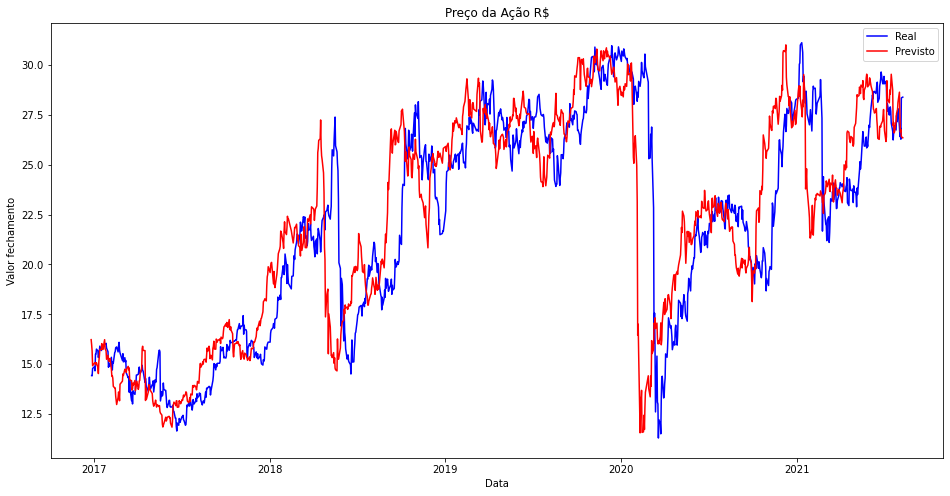

In [85]:
plt.rcParams['figure.figsize'] = (16, 8)
plt.title("Preço da Ação R$")
plt.plot(df_pred["real"],label = "Real", color = "blue")
plt.plot(df_pred["previsao"],label = "Previsto", color = "red")
plt.xlabel("Data")
plt.ylabel("Valor fechamento")
plt.legend()

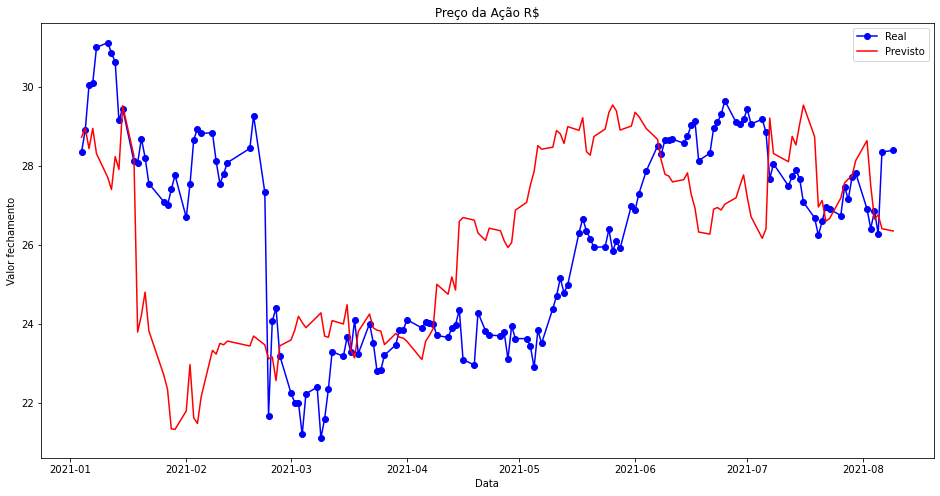

In [86]:
plt.rcParams['figure.figsize'] = (16, 8)
plt.title("Preço da Ação R$")
plt.plot(df_pred_2021["real"],label = "Real", color = "blue", marker = 'o')
plt.plot(df_pred_2021["previsao"],label = "Previsto", color = "red")
plt.xlabel("Data")
plt.ylabel("Valor fechamento")
plt.legend()

### Previsão Day 1

In [87]:
day1 = features.tail(1)
day1

,Low,Open,Volume,mm21D
1635,26.15,26.209999,26770700.0,27.596191


In [88]:
#executando a previsão D1+


previsao=scaler.transform(day1)


pred_D1 =lr.predict(previsao)

pred_D1

array([26.3479019])

In [89]:
data_pregao_full=df['data_pregao']
data_pregao=data_pregao_full.tail(1)

res_full=df_train['Close']
res=res_full.tail(1)

df_day1=pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'previsao':pred_D1})


df_day1.set_index('data_pregao', inplace=True)

print(df_day1)

ValueError: array length 1 does not match index length 2

### Prevendo 50 dias no passado

In [46]:
valor_novo = features.tail(50)
valor_novo

,Low,Open,Volume,mm21D
1586,28.670000,29.180000,40341200.0,28.519048
1587,28.740000,29.090000,43215200.0,28.623333
1588,28.920000,29.030001,71367600.0,28.745238
1589,28.920000,29.740000,65084000.0,28.829524
1590,28.730000,29.299999,37336700.0,28.891905
1591,28.370001,29.010000,56028600.0,28.908571
1592,27.670000,28.700001,97839700.0,28.879048
1593,27.410000,28.150000,73793500.0,28.850000
1594,27.270000,27.400000,80574200.0,28.794286
1595,27.280001,27.580000,53001200.0,28.749048


In [47]:
prev_50=scaler.transform(valor_novo)
pred_50=lr.predict(prev_50)

pred_50

array([28.90559602, 29.00729726, 29.35680017, 29.25031045, 28.94382809,
       28.66917791, 28.13646728, 27.78268623, 27.74023202, 27.59218612,
       27.64741141, 27.82000765, 27.27800375, 26.93279245, 26.32090581,
       26.26865602, 26.89924811, 26.94268612, 26.88016796, 27.02755266,
       27.18985503, 27.48870368, 27.76921552, 27.19953309, 26.71187152,
       26.16204827, 26.40226674, 29.20933069, 28.31120739, 28.10330521,
       28.74601449, 28.52913891, 29.05283936, 29.53727603, 28.73720764,
       26.955735  , 27.11984237, 26.59554154, 26.66424893, 27.18152073,
       27.56378402, 27.66440019, 27.74439186, 28.13433682, 28.63827658,
       27.49959491, 26.64864103, 26.75852242, 26.40601968, 26.3479019 ])

In [50]:
data_pregao_full=df['data_pregao']
print()
data_pregao=data_pregao_full.tail(50)

res_full=df['Close']
res=res_full.tail(50)

df_n=pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'previsao':pred})


df_n.set_index('data_pregao', inplace=True)

df_n

Date
2015-01-02   2015-01-02
2015-01-05   2015-01-05
2015-01-06   2015-01-06
2015-01-07   2015-01-07
2015-01-08   2015-01-08
                ...    
2021-09-01   2021-09-01
2021-09-02   2021-09-02
2021-09-03   2021-09-03
2021-09-06   2021-09-06
2021-09-08   2021-09-08
Name: data_pregao, Length: 1657, dtype: datetime64[ns]


ValueError: array length 1145 does not match index length 50